Document for Model training



Importing packages

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.draw import line

Constants

In [ ]:
img_dim = (500, 500)

In [39]:
#Test of Image

#empty_img = np.zeros(img_dim)
#empty_img[0:10,] = 1
#plt.imshow(empty_img * 256, cmap='gray')


In [33]:
c0 = (int(img_dim[0]/2), 10)      #starting point of blood vessel
p0 = 0.5                          #probability of split
r0 = int(img_dim[0]/2)/50         #length of each split
cntr0 = 0                          #counter of iterations. 
weight = 5

In [36]:
# draws a line from (c: int*int) to (c_new: int*int) in the image img where line thickness is w
def draw_line(c, c_new, img, w):
  #naive line drawing
  for i in range(w):
    rr, cc = line(c[0], c[1]+i, c_new[0], c_new[1]+i)
    img[rr, cc] = 256

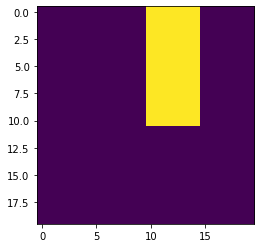

In [37]:
# Test of draw_line 
img0 = np.zeros((20, 20))
draw_line((10,10),(0, 10),img0, weight)
plt.imshow(img0)


In [56]:
import random
import math
from skimage.draw import line
import matplotlib.pyplot as plt

startX = 5
startY = 50
startAngle = 0
maxDepth = 15
lengthMedian = 6
lengthStdVar = 4
biforcProb = 0.3
angleBiforc = math.pi/8
angleStdDev = math.pi/16



def newLength():
    return random.gauss(lengthMedian, lengthStdVar)

def newAngle(angle):
    return random.gauss(angle, angleStdDev)

def newCoords(coord, angle):
    length = newLength()
    x,y = coord
    newX = x + math.cos(angle)*length
    newY = y + math.sin(angle)*length
    return newX,newY


class Node:
    def __init__(self, coord, angle, d):
        self.coord = coord
        self.d = d
        self.angle = angle
        self.children = []

    #Creates a child node
    def createChild(self,angle):
        newA = newAngle(angle)
        newCoord = newCoords(self.coord, newA)
        return Node(newCoord, newA, self.d-1)
    
    #Creates and add either 1 or 2 children to the parent node.
    def addChildren(self):
        biforcation = (random.random() < biforcProb)
        if biforcation:
            #Make 2 children mirrored across an angle
            leftChild = self.createChild(self.angle + angleBiforc)
            self.children.append(leftChild)
            rightChild = self.createChild(self.angle - angleBiforc)
            self.children.append(rightChild)
        else:
            #Make 1 child following an angle
            singleChild = self.createChild(self.angle)
            self.children.append(singleChild)

class Tree:
    def __init__(self):
        ()

    def addRoot(self,x,y, startAngle, d):
        self.root = Node((x,y), startAngle, d)


def treeHelper(node):
    if node.d == 1:
        return
    else:
        node.addChildren()
        for child in node.children:
          treeHelper(child)

def makeTree(startCoord, startAngle):
    tree = Tree()
    tree.addRoot(startCoord[0], startCoord[1], startAngle, maxDepth)
    treeHelper(tree.root)
    return tree

def nodeInside(cx, cy, X, Y):
  return (cx < X and cx >= 0 and cy < Y and cy >= 0)

def drawNode(node, arr):
  if len(node.children) >= 1:
    X, Y = arr.shape
    px, py = int(node.coord[0]), int(node.coord[1])
    for child in node.children:
      cx, cy = int(child.coord[0]), int(child.coord[1])
      if nodeInside(cx, cy, X, Y) and nodeInside(px, py, X, Y):
        rr, cc = line(px, py, cx, cy)
        #print(cx, cy, px, py, rr, cc)
        arr[rr, cc] = 1 
      drawNode(child, arr)
  else:
    return




#Makes a treewalk, and finds minimum and maximum x, y values for tree
def drawTree(tree, arr):
  drawNode(tree.root, arr)
  arr = arr*256
  plt.imshow(arr, cmap='gray')
  #help function that draws line from parent to each of its children. Should check for borders

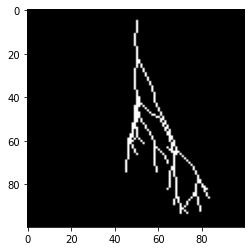

In [79]:
arr = np.zeros((100, 100))

tree = makeTree((startX, startY), startAngle)
drawTree(tree, arr)
